In [1]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [2]:
crimes = Table.read_table("/content/crime_rates.csv")
crimes = crimes.select('State','Year','Population','Murder Rate')
crimes = crimes.set_format('Population',NumberFormatter)
crimes

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


Question 1.2

Text(0, 0.5, 'Murder Rate')

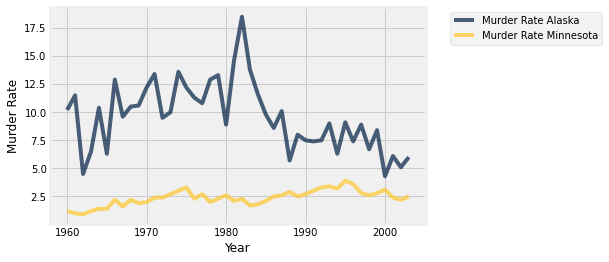

In [3]:
ak = crimes.where('State','Alaska')
ak = (ak.relabeled('Murder Rate','Murder Rate Alaska')).select('Year','Murder Rate Alaska')
mn = crimes.where('State','Minnesota')
mn = mn.relabeled('Murder Rate','Murder Rate Minnesota').select('Year','Murder Rate Minnesota')
ak_mn = ak.join('Year',mn)
ak_mn.plot('Year')
plots.ylabel('Murder Rate')

Question 1.3

In [0]:
def most_murderous(year):
  """
  Plots a bar graph for top 5 states with highest murder rate. 
  Also returns an array containing states sorted with murder rates in increasing order
  """
  high_crime = (crimes.where('Year',year)).sort('Murder Rate',descending=True)
  (high_crime.take(np.arange(5))).barh('State','Murder Rate')
  plots.title('States with top 5 Murder Rate')
  return (high_crime.sort('Murder Rate',descending=False)).column('State')

array(['Maine', 'North Dakota', 'New Hampshire', 'Iowa', 'Idaho',
       'Montana', 'Utah', 'Wyoming', 'South Dakota', 'Minnesota',
       'Vermont', 'Hawaii', 'Rhode Isla', 'Nebraska', 'Massachuse',
       'Wisconsin', 'Oregon', 'Delaware', 'Washington', 'New Jersey',
       'Colorado', 'Ohio', 'Connecticut', 'Kansas', 'Kentucky',
       'Pennsylvania', 'West Virginia', 'Indiana', 'New Mexico',
       'Virginia', 'Oklahoma', 'Arizona', 'Florida', 'Alaska', 'Michigan',
       'Tennessee', 'Arkansas', 'South Carolina', 'Nevada',
       'North Carolina', 'Missouri', 'Illinois', 'Georgia', 'Alabama',
       'Texas', 'Maryland', 'California', 'New York', 'Mississippi',
       'Louisiana'], dtype='<U14')

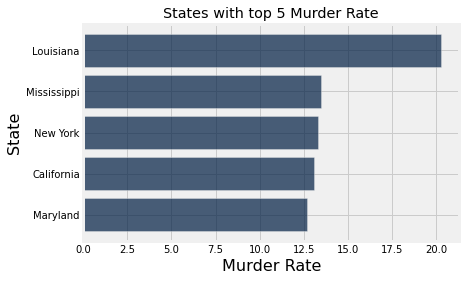

In [5]:
most_murderous(1993)

Question 1.4

In [5]:
ca = crimes.where('State','California')
ca_1975 = ((ca.where('Year',1975)).column('Murder Rate') * (ca.where('Year',1975)).column('Population'))/100000
ca_1988 = ((ca.where('Year',1988)).column('Murder Rate') * (ca.where('Year',1988)).column('Population'))/100000
int(ca_1988 - ca_1975)

726

Question 2.1

In [0]:
def two_year_changes(murder_rates):
  """
  Returns the difference of increase and decrease in murder rates for a two year period for a state
  """
  murder_rates = np.round(murder_rates,decimals=1)
  result = np.array([])
  i=0
  while i < len(murder_rates) :
    j = i + 2
    if (j<len(murder_rates)):
      result = np.append(result,murder_rates[j] - murder_rates[i])
      i += 1
    else:
      break

  return np.count_nonzero(result>0) - np.count_nonzero(result<0)

Question 2.2

In [24]:
murder_changes = Table().with_column('State',np.unique(crimes.column('State')))
changes_by_state = np.array([])
states = murder_changes.column('State')
i = 0
while i < len(states):
  temp = ((crimes.select('State','Year','Murder Rate')).where('State',states[i])).column('Murder Rate')
  changes_by_state = np.append(changes_by_state,two_year_changes(temp))
  i += 1

murder_changes = murder_changes.with_column('changes_by_state',changes_by_state)
murder_changes.show(5)

State,changes_by_state
Alabama,-6
Alaska,-5
Arizona,1
Arkansas,-1
California,17


Question 2.3

In [25]:
total_changes = np.count_nonzero(changes_by_state>0) - np.count_nonzero(changes_by_state<0)
total_changes

5

Question 2.4

In [26]:
states = np.unique(crimes.column('State'))
years = np.unique(crimes.column('Year'))

changes_for_one_state = 0

for i in range(years[0],years[len(years)-1],1):
  if i + 2 in years:
    changes_for_one_state+=1
  else:
    break
  
num_changes = len(states) * changes_for_one_state
num_changes

2100

Question 2.5

---



Test Statistic: 
Difference of increase and decrease of Murder Rate for a state

Question 2.6

In [0]:
def simulate_under_null(num_chances_to_change):
  """
  Simulates some number changing several times, with an equal
  chance to increase or decrease. Returns the value of your
  test statistic for these simulated changes.
  num_chances_to_change is the number of times the number changes.
  """
  uniform = Table().with_columns("Change", make_array('Increase', 'Decrease'),"Chance", make_array(0.5,0.5))
  uniform = uniform.sample_from_distribution('Chance', num_chances_to_change)
  return np.diff(uniform.column('Chance sample'))

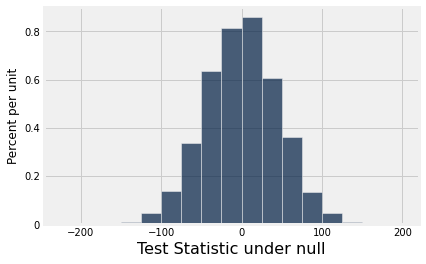

In [28]:
uniform_samples = make_array()
iterations = 10000

for i in np.arange(iterations):
  uniform_samples = np.append(uniform_samples,simulate_under_null(num_changes))

(Table().with_column('Test Statistic under null',uniform_samples)).hist(0,bins=np.arange(-200-25,200+25,25))

Question 2.7

In [29]:
p_value = np.abs(np.count_nonzero(uniform_samples>0) - np.count_nonzero(uniform_samples<0))/iterations
p_value

0.0067

We see the left side and the right side of the histogram almost cancel each other. 

And also we see the p value is about 1% which is 'highly statistically significant'

Question 3.1

---



Population - All the people in the United States

Control Group - People for whom Death Penalty is in effect

Treatment Group - People for whom Death Penalty is in effect

Outcome - Murder Rate

Question 3.2


---

Some years with low economic growth, high unemployment and other factors may have high crime rates and
high murder rates compared to other years. So comparison across years may not indicate towards effect of
capital punishment on murder rates



Question 3.3

In [30]:
no_death_penalty_states = np.array(['Alaska','Hawaii','Maine','Michigan','Wisconsin','Minnesota'])
death_penalty_murder_rates = crimes.where('State',are.not_contained_in(no_death_penalty_states ))
death_penalty_murder_rates

State,Year,Population,Murder Rate
Alabama,1960,"3,266,740",12.4
Alabama,1961,"3,302,000",12.9
Alabama,1962,"3,358,000",9.4
Alabama,1963,"3,347,000",10.2
Alabama,1964,"3,407,000",9.3
Alabama,1965,"3,462,000",11.4
Alabama,1966,"3,517,000",10.9
Alabama,1967,"3,540,000",11.7
Alabama,1968,"3,566,000",11.8
Alabama,1969,"3,531,000",13.7


Question 3.4

In [31]:
period = death_penalty_murder_rates.where('Year',are.contained_in(np.array([1971,1973])))
death_penalty_states = np.unique(death_penalty_murder_rates.column('State'))

change = np.array([])
i = 0

while i < len(death_penalty_states):
  change = np.append(change,np.diff((period.where('State',death_penalty_states[i])).column('Murder Rate')))
  i+=1

changes_72 = np.count_nonzero(change>0) - np.count_nonzero(change<0)
changes_72

22

Question 3.5

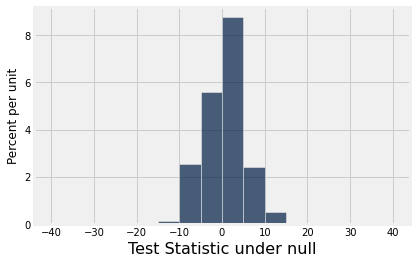

In [32]:
sample = np.array([])
for i in np.arange(iterations):
  sample = np.append(sample,simulate_under_null(changes_72))

(Table().with_column('Test Statistic under null',sample)).hist(0,bins=np.arange(-40,40+5,5))

Question 3.6

In [33]:
p_value = np.abs(np.count_nonzero(sample>0) - np.count_nonzero(sample<0))/iterations
p_value

0.0026

We see the left side and the right side of the histogram almost cancel each other.

And also we see the p value is about 0.3% which is 'highly statistically significant', meaning that the
chance that our null hypothesis is true is extrememly unlikely. 

We reject our null hypothesis and accept our
alternative hypothesis.

Question 4.1

In [0]:
def run_test(murder_rates,year):
  """
  It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis.
  """
  num_states = len(np.unique(murder_rates.column('State')))
  states = np.unique(murder_rates.column('State'))
  table = murder_rates.where('Year',are.contained_in(make_array(year,year+2)))
  changes = np.array([])
  
  for i in np.arange(num_states):
    murder_rate_change = np.diff((table.where('State',states[i])).column('Murder Rate'))
    changes = np.append(changes,murder_rate_change)
  
  statistic = np.count_nonzero(changes>0) - np.count_nonzero(changes<0)
  print(statistic)
  
  samples = np.array([])
  
  for i in np.arange(iterations):
    samples = np.append(samples,simulate_under_null(num_states))
  
  if statistic > 0:
    return np.count_nonzero(samples>=statistic)/iterations
  elif statistic < 0:
    return np.count_nonzero(samples<=statistic)/iterations

In [35]:
run_test(death_penalty_murder_rates,1971)

22


0.0005

Question 4.3

In [36]:
run_test(death_penalty_murder_rates,1976)

10


0.0918

Question 5.1

In [37]:
years = np.unique(crimes.column('Year'))

death_penalty_avg = crimes.where('State',are.not_contained_in(no_death_penalty_states))
death_penalty_avg = (death_penalty_avg.drop('Population')).group('Year',np.average)

non_death_penalty_avg = crimes.where('State',are.contained_in(no_death_penalty_states))
non_death_penalty_avg = (non_death_penalty_avg.drop('Population')).group('Year',np.average)

avg_murder_rates = Table().with_columns('Year',years,'Death Penalty States',death_penalty_avg.column('Murder Rate average'),'No death penalty states',non_death_penalty_avg.column('Murder Rate average'))
avg_murder_rates

Year,Death Penalty States,No death penalty states
1960,5.27955,3.55
1961,4.77727,3.68333
1962,4.61591,2.33333
1963,4.61364,2.75
1964,4.71136,3.4
1965,4.82727,3.18333
1966,5.43182,4.51667
1967,5.875,3.73333
1968,6.27045,4.73333
1969,6.50227,4.73333


Question 5.2

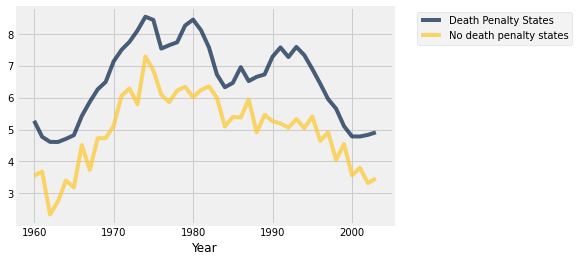

In [38]:
avg_murder_rates.plot('Year')

Murder rates for states with no death penalty  are consistently lower than the ones with death penalty. 

Also  the rates seem to rise and fall together with a similar trend across all states, both with and without the death
penalty. 

Question 5.3

---

The plot shows that neither the abolishment nor the re-institaing death penalty directly affect murder rates.

Before to the abolishment, murder rates had been increasing steadily from 1960 to 1970. 



Question 5.5

---
When in 1971 when the penalty is lifted in the states, we see our hypothesis supporting alternative. But in 1976 when it is repealed we see supporting null hypothesis again. 

It keeps contradicting over the period of data as there are a lot of other external dependencies which is causing this trend. 

Therefore, there does not seem to be a causal relationship between increases and decreases to murder rates
and whether or not a state has the death penalty. 



In [0]:
def diff_n(values, n):
  return np.array(values)[n:] - np.array(values)[:-n]

In [38]:
diff_n(make_array(1, 2, 4, 7, 10),2)

array([3, 5, 6])